In [1]:
# things we will need to do stuff in this notebook
import numpy as np
import pandas as pd
from scipy import stats
from numpy.linalg import norm
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

# two useful data viz libraries
import matplotlib.pyplot as plt
import seaborn as sns

# setup plotting in a notebook in a reasonable way
%matplotlib inline
%config InlineBackend.figure_format='retina'

# default figure aesthetics I'll be using, 
# there are other choices, see seaborn docs
sns.set_style("white")
sns.set_context("notebook")

In [2]:
# lets get some 🐧 data to work with
# NOTE: numeric values have different orders of magnitude; also nan!!
penguins = sns.load_dataset("penguins").dropna()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [3]:
numeric = penguins.columns[(penguins.dtypes == float)]
data = penguins[numeric]
data
# only retain numeric columns

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


Fxn below comes form scipy.cluster https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html#module-scipy.cluster.hierarchy 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage linkage fxn performs hierarchical clustering!

In [4]:
def all_linkages(data):
    # do hierarchical clustering with all 4 metrics
    tree_sing = linkage(data,method='single')
    tree_cplt = linkage(data,method='complete')
    tree_avrg = linkage(data,method='average')
    tree_ward = linkage(data,method='ward')

    fig, axs = plt.subplots(2,2, figsize=(12,12))

    dendrogram(tree_sing, ax=axs[0,0])
    axs[0,0].set_title('Single linkage')
    xlim = axs[0,0].get_xlim()
    axs[0,0].set_yticks([])
    axs[0,0].set_xticks([])
    axs[0,0].set_xlim(xlim)


    dendrogram(tree_cplt, ax=axs[0,1])
    axs[0,1].set_title('Complete linkage')
    axs[0,1].set_yticks([])
    axs[0,1].set_xticks([])

    dendrogram(tree_avrg, ax=axs[1,0])
    axs[1,0].set_title('Average linkage')
    axs[1,0].set_yticks([])
    axs[1,0].set_xticks([])

    dendrogram(tree_ward, ax=axs[1,1])
    axs[1,1].set_title('Ward linkage');
    axs[1,1].set_yticks([])
    axs[1,1].set_xticks([])

    sns.despine(left=True, bottom=True)
    
    return tree_sing, tree_cplt, tree_avrg, tree_ward

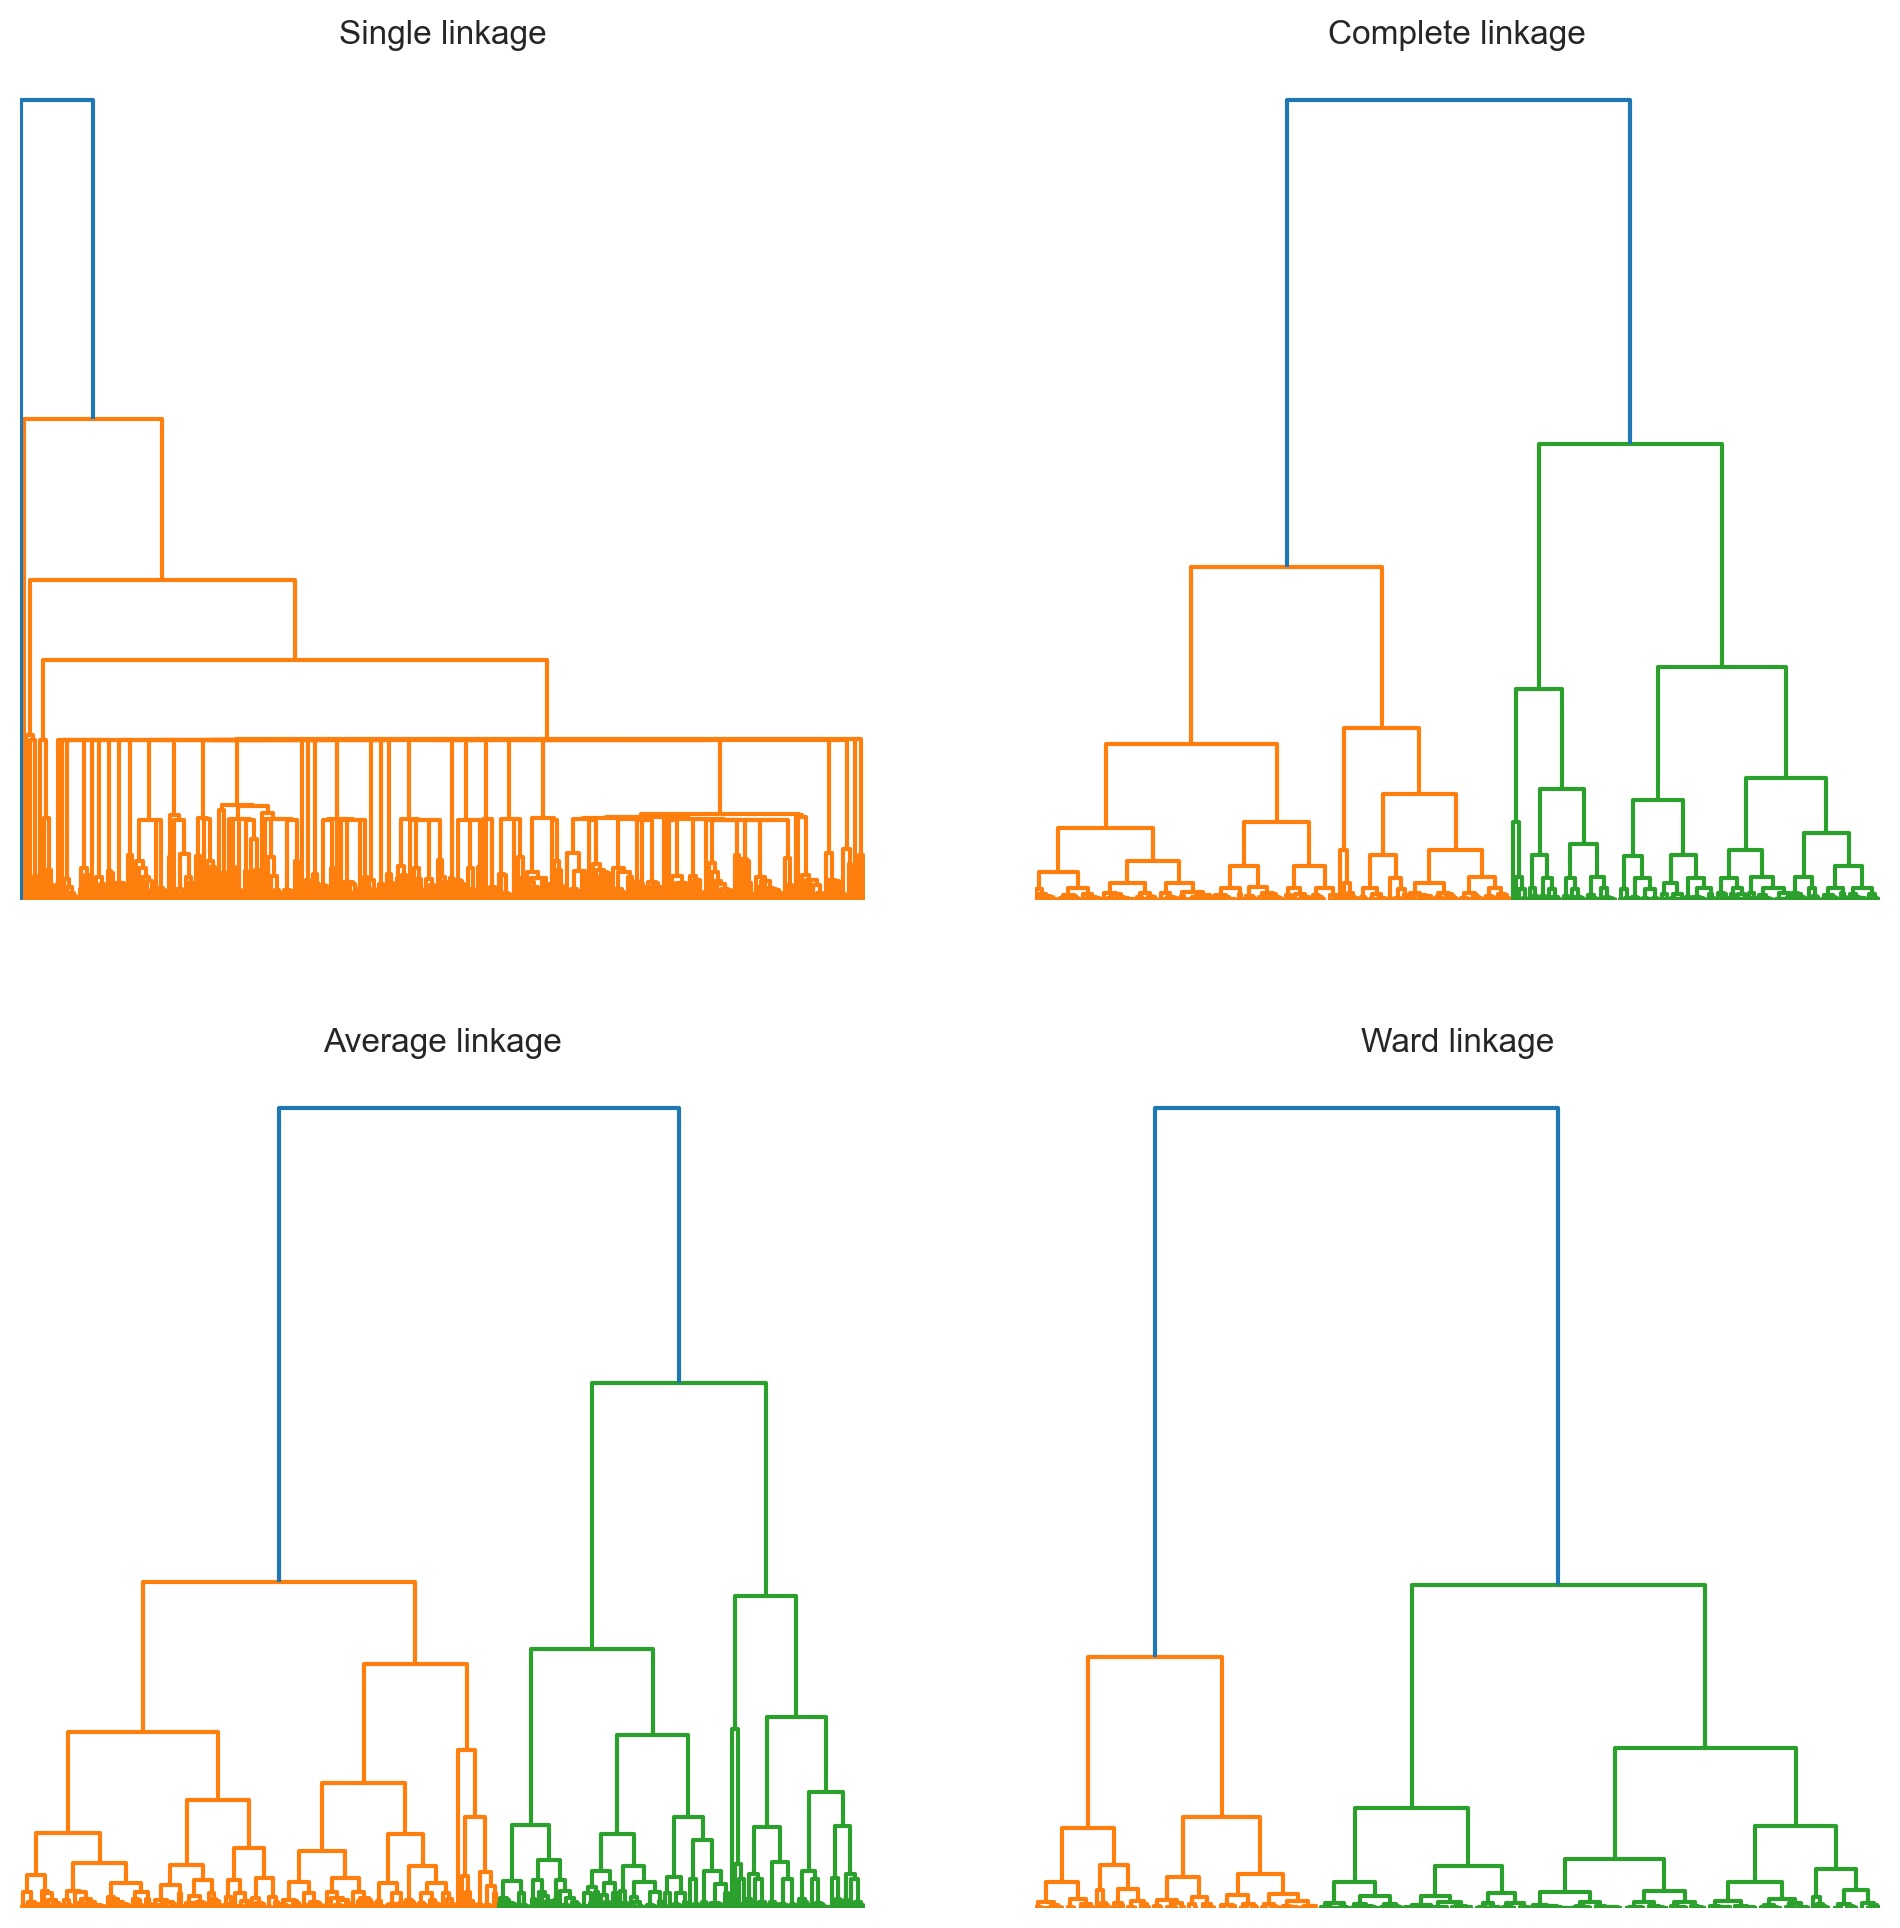

In [5]:
tree_sing, tree_cplt, tree_avrg, tree_ward = all_linkages(data)

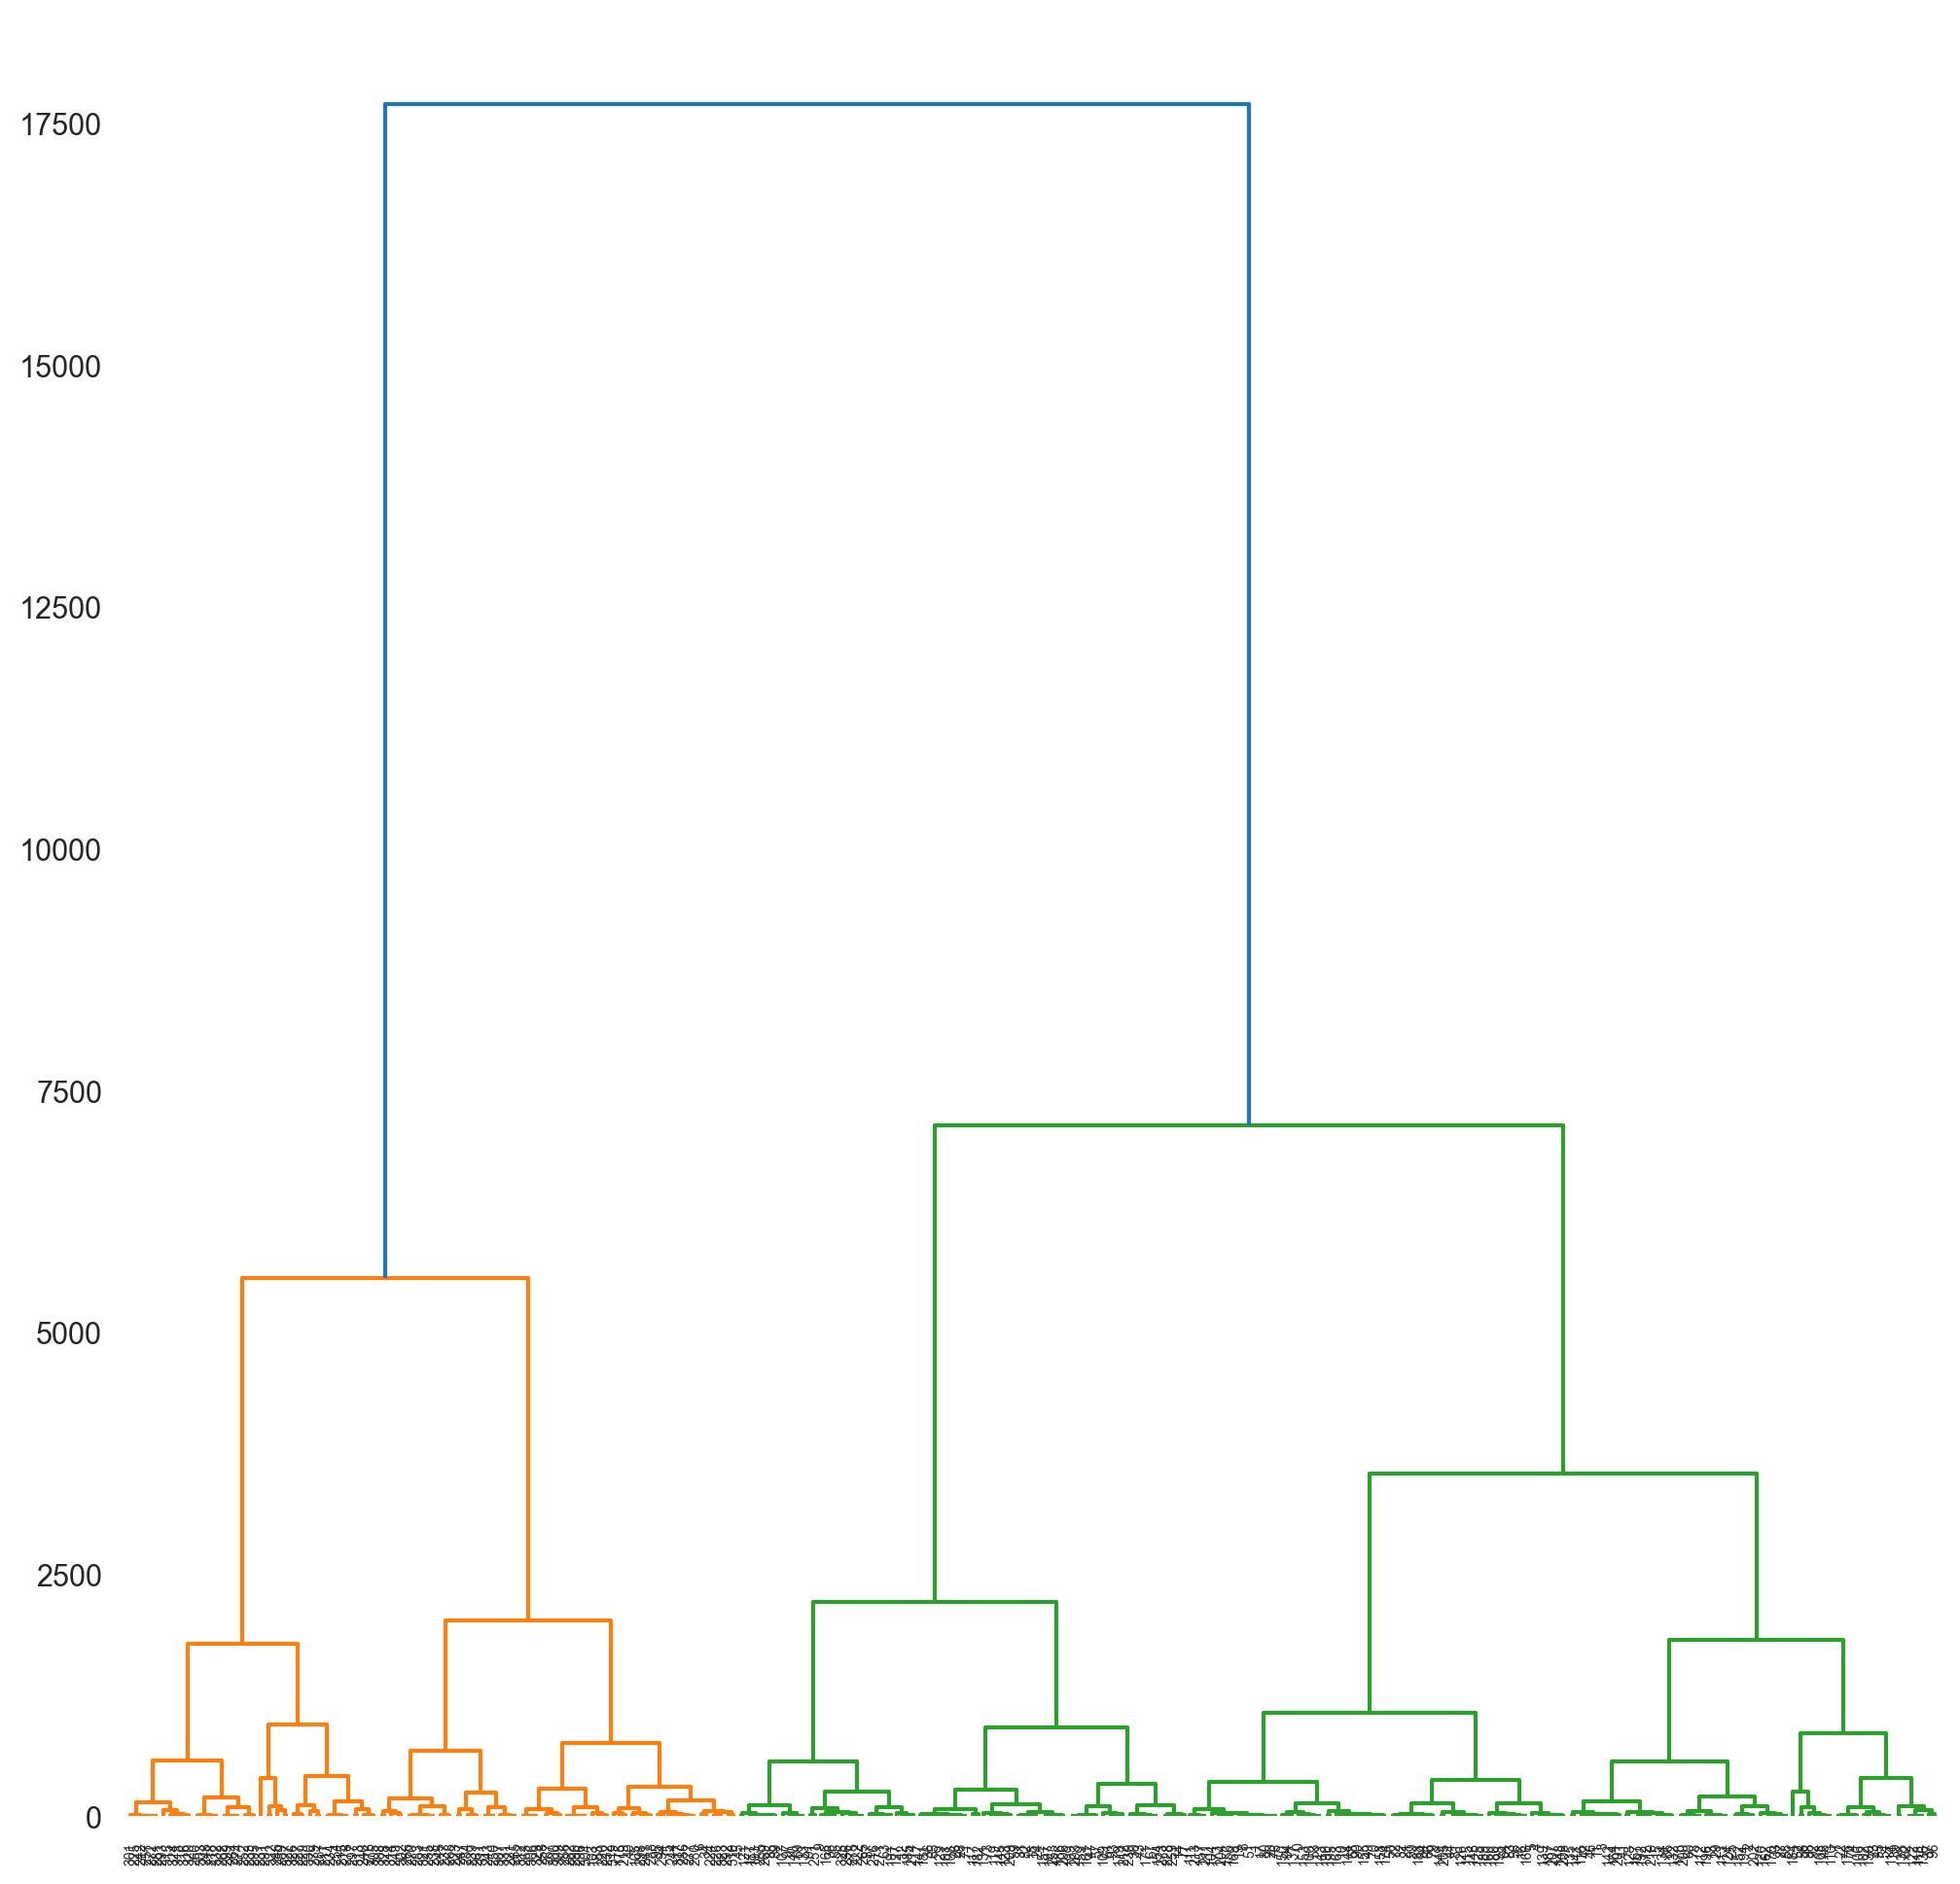

In [6]:
fig, ax = plt.subplots(figsize=(12,12))

dendrogram(tree_ward, ax=ax);
sns.despine(left=True,bottom=True)

In [7]:
# the tree is not a cluster. you must use fcluster fxn to cut the tree at different heights in order to create the clusters!
# try different values trying to pull out unique combinations of species or species-sex
# t = how high up the tree do you want to cut; 
# criterion = distance, means distance between clusters (in the unit of height listed in the dendrogram^^)
clust = fcluster(tree_ward, criterion='distance', t=2500) 
clust
# output is an array of labels: which cluster does each data point belong to

array([4, 4, 5, 5, 4, 4, 2, 5, 4, 3, 4, 5, 3, 5, 3, 5, 4, 4, 3, 4, 4, 4,
       5, 5, 3, 5, 3, 5, 3, 5, 3, 3, 4, 5, 2, 5, 3, 5, 3, 5, 2, 5, 5, 3,
       4, 3, 5, 3, 5, 4, 4, 4, 5, 4, 5, 3, 4, 3, 5, 3, 5, 3, 5, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 5, 2, 4, 3, 5, 4, 4, 4, 3, 4, 4, 3, 5, 3,
       5, 3, 4, 3, 5, 3, 4, 2, 5, 3, 5, 4, 4, 3, 5, 2, 4, 2, 5, 3, 3, 3,
       5, 4, 5, 5, 5, 4, 5, 3, 5, 3, 5, 3, 5, 3, 5, 4, 4, 3, 5, 3, 5, 3,
       5, 3, 5, 5, 5, 4, 5, 4, 3, 5, 5, 4, 4, 3, 4, 3, 4, 4, 4, 3, 5, 4,
       3, 4, 4, 4, 4, 3, 4, 3, 5, 4, 5, 3, 4, 5, 5, 4, 5, 3, 5, 4, 4, 2,
       5, 3, 5, 3, 4, 3, 3, 2, 5, 3, 3, 4, 4, 4, 4, 3, 5, 3, 5, 4, 5, 3,
       4, 3, 5, 5, 5, 3, 4, 4, 3, 4, 4, 3, 5, 4, 3, 4, 3, 1, 3, 1, 1, 2,
       2, 2, 3, 2, 2, 1, 2, 1, 3, 1, 3, 1, 2, 1, 1, 2, 3, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 1, 2, 1, 2, 2, 3, 1, 3, 1, 3, 2, 1, 2, 3, 1, 2, 1, 2,
       1, 3, 2, 2, 2, 3, 2, 3, 1, 3, 1, 3, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,

In [8]:
penguins['cluster']=clust
penguins.groupby('cluster')[['species','sex']].value_counts()

cluster  species    sex   
1        Gentoo     Male      46
2        Gentoo     Female    42
                    Male      15
         Adelie     Male       7
         Chinstrap  Male       2
3        Adelie     Male      45
         Chinstrap  Male      17
         Gentoo     Female    16
         Chinstrap  Female     4
         Adelie     Female     1
4        Adelie     Female    24
                    Male      18
         Chinstrap  Female    17
                    Male      11
5        Adelie     Female    48
         Chinstrap  Female    13
                    Male       4
         Adelie     Male       3
Name: count, dtype: int64

In [9]:
# what is wrong? why can't we get a good clustering?  is there something about the data?

In [10]:
# YOUR CODE HERE TO SOLVE THE SOLUTION
# copy paste things above to get a cluster analysis once you've figured out the issue
scaler = StandardScaler()
data_scale = scaler.fit_transform(data)

In [11]:
data

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [12]:
data_scale

array([[-0.89604189,  0.7807321 , -1.42675157, -0.56847478],
       [-0.82278787,  0.11958397, -1.06947358, -0.50628618],
       [-0.67627982,  0.42472926, -0.42637319, -1.1903608 ],
       ...,
       [ 1.17338426, -0.74499437,  1.50292796,  1.91906927],
       [ 0.22108196, -1.20271231,  0.78837197,  1.23499466],
       [ 1.08181673, -0.54156417,  0.85982757,  1.48374906]])

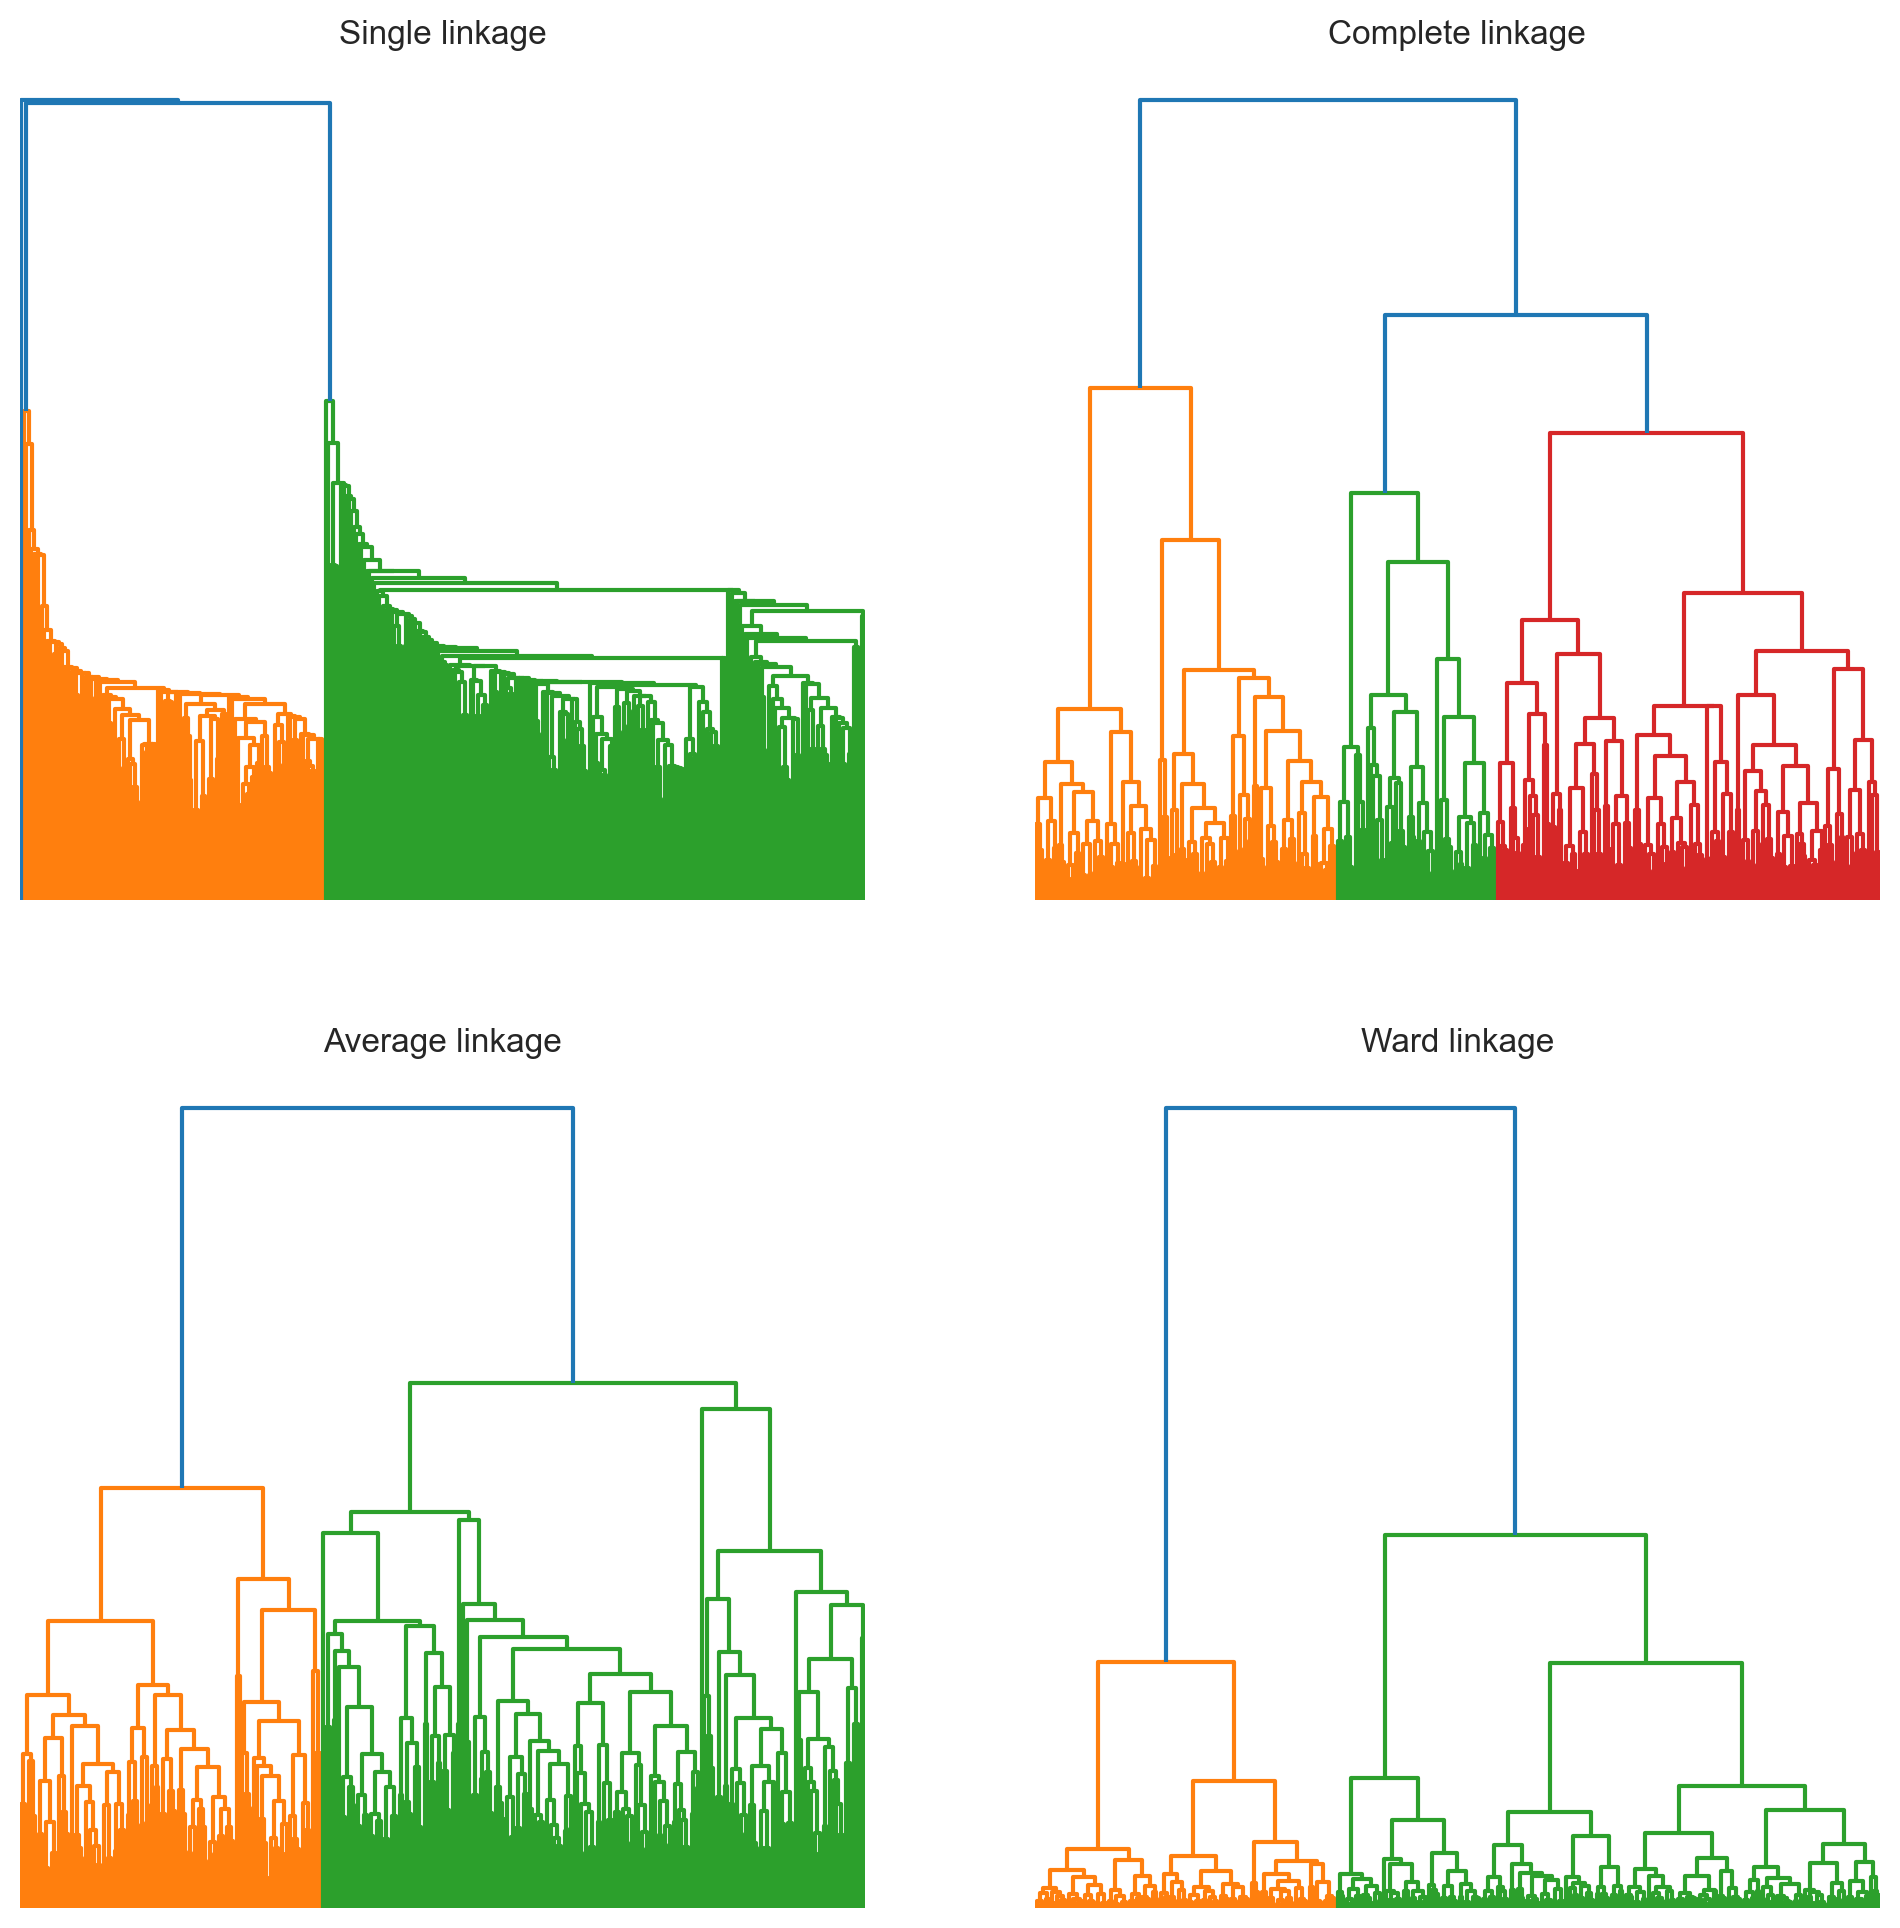

In [13]:
tree_sing, tree_cplt, tree_avrg, tree_ward = all_linkages(data_scale)

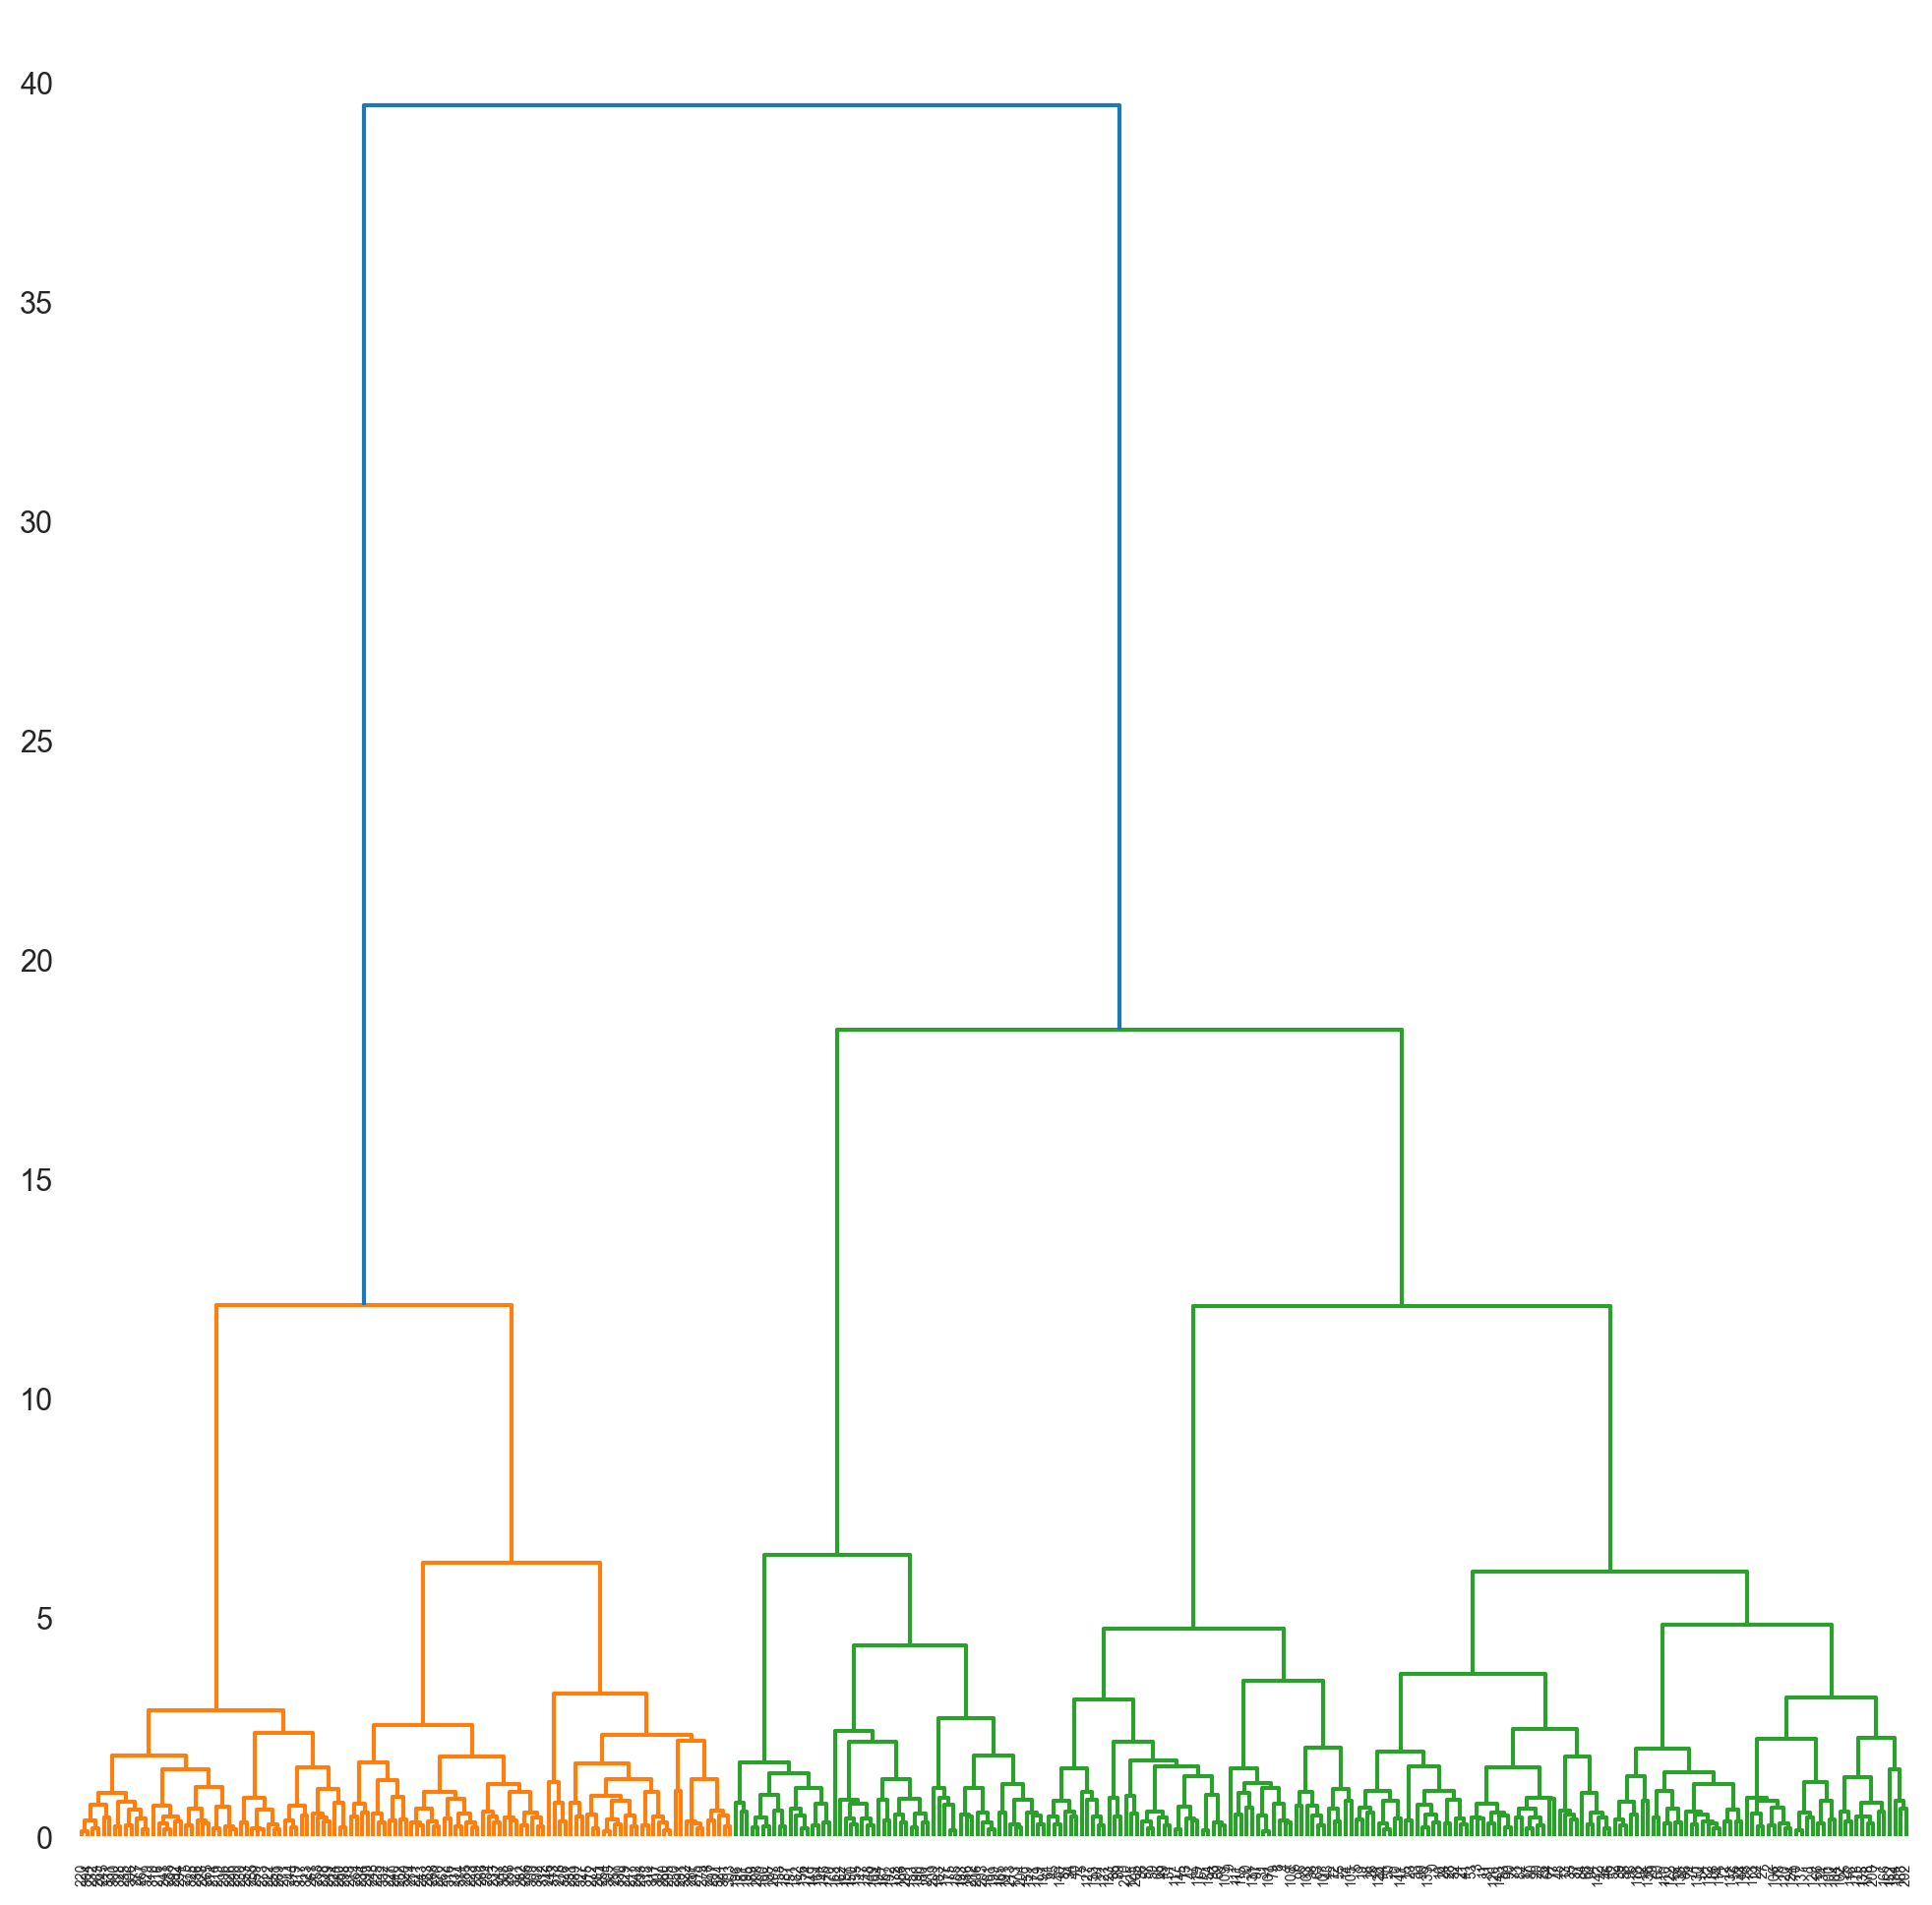

In [14]:
fig, ax = plt.subplots(figsize=(12,12))

dendrogram(tree_ward, ax=ax);
sns.despine(left=True,bottom=True)

In [23]:
clust = fcluster(tree_ward, criterion='distance', t=6.4) 

In [24]:
penguins['cluster']=clust
penguins.groupby('cluster')[['species','sex']].value_counts()

cluster  species    sex   
1        Gentoo     Female    49
2        Gentoo     Male      61
                    Female     9
3        Chinstrap  Female    18
4        Chinstrap  Male      34
                    Female     5
5        Adelie     Male      52
         Chinstrap  Female     3
         Adelie     Female     1
6        Adelie     Female    72
                    Male      21
         Chinstrap  Female     8
Name: count, dtype: int64